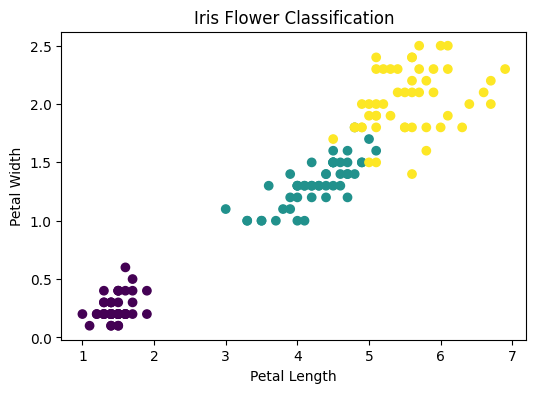

interactive(children=(Dropdown(description='x_feature', options=('sepal length (cm)', 'sepal width (cm)', 'pet…

interactive(children=(FloatSlider(value=5.5, description='sepal_length', max=8.0, min=4.0), FloatSlider(value=…

<function __main__.plot_with_custom_values(sepal_length, sepal_width, petal_length, petal_width)>

In [53]:
#Task-1
#imported Skicit library(for data packets)
from sklearn.datasets import load_iris
# pandas library for (rows and columns)
import pandas as pd


iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target


new_var = df.head()


new_var

df['species_name'] = df['species'].map({
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'
})
# for showing data on screen
df.head()
#import library for graph
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['species'])
plt.xlabel ('Petal Length')
plt.ylabel ('Petal Width')
plt.title('Iris Flower Classification')
plt.show()
# ready the data for ML
from sklearn.model_selection import train_test_split

X = df.drop(['species', 'species_name'], axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#created ML model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
#model train
model.fit(X_train, y_train)
#answer prediction by model
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
accuracy

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

features = iris.feature_names
features
def interactive_plot(x_feature, y_feature):
    plt.figure(figsize=(6,4))
    plt.scatter(df[x_feature], df[y_feature], c=df['species'])
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Iris Classification: {x_feature} vs {y_feature}')
    plt.show()

interact(
    interactive_plot,
    x_feature=features,
    y_feature=features
)

def plot_with_custom_values(
    sepal_length,
    sepal_width,
    petal_length,
    petal_width
):
    plt.figure(figsize=(6,4))

    # Existing dataset
    plt.scatter(
        df['petal length (cm)'],
        df['petal width (cm)'],
        c=df['species'],
        alpha=0.5
    )

    # Custom point (user input)
    plt.scatter(
        petal_length,
        petal_width,
        color='red',
        s=200,
        label='Custom Flower'
    )

    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title('Iris Classification with Custom Input')
    plt.legend()
    plt.show()

interact(
    plot_with_custom_values,
    sepal_length=widgets.FloatSlider(min=4, max=8, step=0.1, value=5.5),
    sepal_width=widgets.FloatSlider(min=2, max=4.5, step=0.1, value=3.0),
    petal_length=widgets.FloatSlider(min=1, max=7, step=0.1, value=4.0),
    petal_width=widgets.FloatSlider(min=0.1, max=2.5, step=0.1, value=1.3)
)


